# Data Extraction

## Get the global annual temp

select * from global_data

Save them in global_temp.csv

## Get the local annual temp

select * from city_list where city = 'Paris'

Save them in paris_temp.csv

# Read Data
We will use Pandas to read the CSV data.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

df_global = pd.read_csv("global_temp.csv", sep=',', index_col=False, )

df_global.columns
df_global.head(3)

df_local = pd.read_csv("paris_temp.csv", sep=',', index_col=False)
# Rename temp column
df_local.columns = ["year", "city", "country", "Paris_avg"]
df_local.head(3)

Index(['year', 'avg_temp'], dtype='object')

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78


,year,city,country,Paris_avg
0,1743,Paris,France,7.65
1,1744,Paris,France,11.48
2,1745,Paris,France,4.73


### Merge data in one dataset
We saw that Paris temp begin in 1743, while Global temp is only avaliable since 1750. So we will do an inner join to merge only temp value prensent in both dataset.


In [3]:
df_all = df_global.merge(df_local, left_on='year', right_on='year', how='inner')
df_all.head(3)

,year,avg_temp,city,country,Paris_avg
0,1750,8.72,Paris,France,11.18
1,1751,7.98,Paris,France,11.15
2,1752,5.78,Paris,France,6.97


## Moving average
Moving average could be computed with Pandas rolling function. We could add it to the dataset or compute it only when rendering the plot.

In [4]:
df_all['global_ma'] = df_all['avg_temp'].rolling(window=20).mean()
df_all['local_ma'] = df_all['Paris_avg'].rolling(window=20).mean()

# Display
We could use the plot function included in Pandas, which return a Matplotlib object, or directly use Matplotlib.

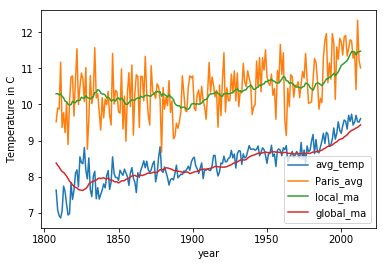

In [26]:
ax = df_all.plot(x='year', y=['avg_temp', 'Paris_avg', 'local_ma', 'global_ma'])
ax.set_ylabel("Temperature in C"); # the ';' at the end avoid text output

### Trying different MA range
When computing MA at display time, we could display many different range for MA calculation. To get different insight.

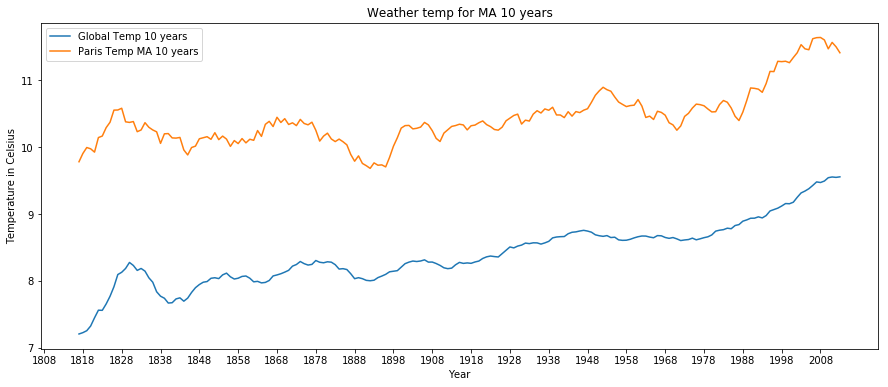

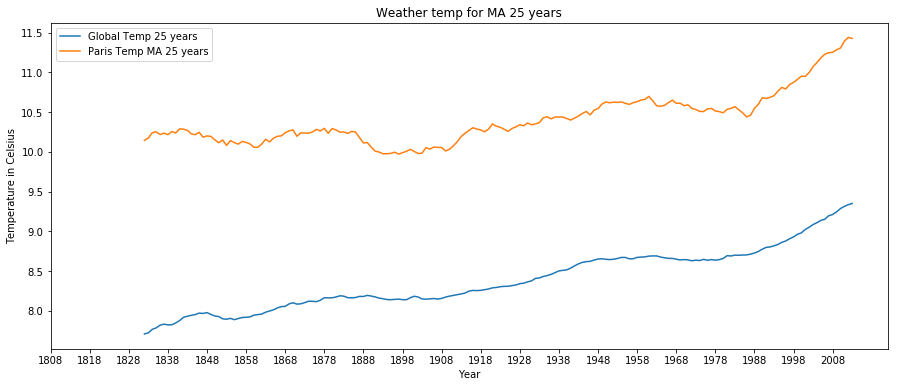

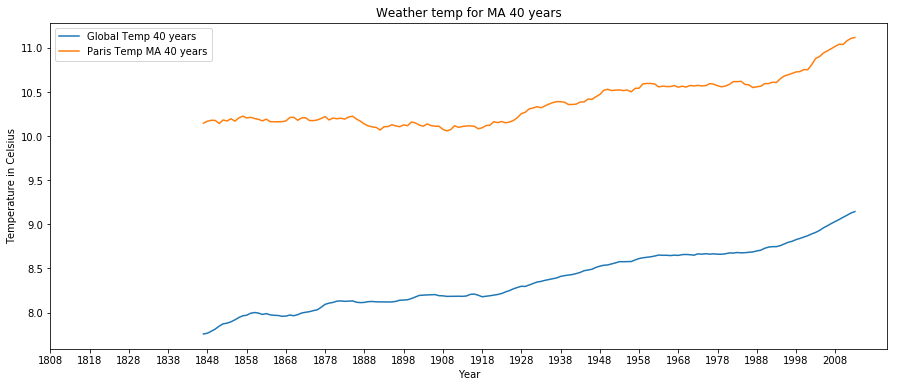

In [25]:
import matplotlib.pyplot as plt
import numpy as np
for ma_range in range(10,50,15):
    _ = plt.figure(figsize=(15,6)); # the '_ =' at the begining avoid text output by putting result in _
    _ = plt.plot( df_all['year'], df_all['avg_temp'].rolling(ma_range).mean(),label= 'Global Temp '+str(ma_range)+' years');
    _ = plt.plot( df_all['year'], df_all['Paris_avg'].rolling(ma_range).mean(),label= 'Paris Temp MA '+str(ma_range)+' years');
    _ = plt.ylabel('Temperature in Celsius');
    _ = plt.xlabel('Year');
    _ = plt.legend(loc='best');
    _ = plt.title('Weather temp for MA ' + str(ma_range) + ' years');
    _ = plt.xticks(np.arange(min(df_all['year']), max(df_all['year']), 10));
    plt.show()

## Correlation
Compute Pearson Correlation

In [7]:
print("Pearson correlation with raw data:", df_all['avg_temp'].corr(df_all['Paris_avg']))
print("Pearson correlation with 20 years MA data:", df_all['avg_temp'].rolling(20).mean().corr(df_all['Paris_avg'].rolling(20).mean()))

Pearson correlation with raw data: 0.5521879187678227
Pearson correlation with 20 years MA data: 0.8916775943923559


The correlation increase when we increase the moving average range.
That mean that the correlation does not really exist when looking to individual year, but over time there is a strong correlation.

## Graph local vs Global

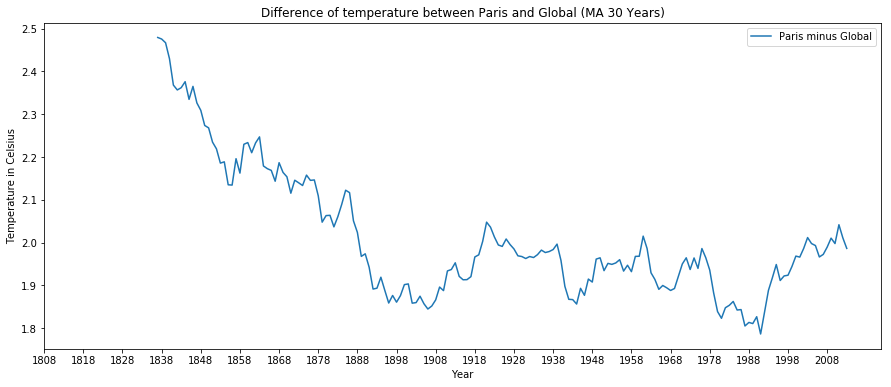

In [20]:
plt.figure(figsize=(15,6))
plt.plot( df_all['year'], df_all['Paris_avg'].rolling(30).mean() - df_all['avg_temp'].rolling(30).mean(),label= 'Paris minus Global');
plt.legend(loc='best');
plt.title('Difference of temperature between Paris and Global (MA 30 Years)');
plt.ylabel('Temperature in Celsius');
plt.xlabel('Year');
plt.xticks(np.arange(min(df_all['year']), max(df_all['year']), 10));
plt.show();

In [9]:
df_diff = df_all['Paris_avg'] - df_all['avg_temp']
print("The mean of the difference between Paris temp and global temp is ", df_diff.mean() )

The mean of the difference between Paris temp and global temp is  2.0442424242424253


## Adding other Cities
I choose Oslo (Norway) and Cairo (Egypt) to view if global warming have the same proportion between cold and hot cities.

In [10]:
df_cairo = pd.read_csv("cairo_temp.csv", sep=',', index_col=False)
# Rename temp column
df_cairo.columns = ["year", "city", "country", "Cairo_avg"]
#df_cairo.head(30)

df_oslo = pd.read_csv("oslo_temp.csv", sep=',', index_col=False)
# Rename temp column
df_oslo.columns = ["year", "city", "country", "Oslo_avg"]
#df_oslo.head(3)

df_all = df_all.merge(df_oslo, left_on='year', right_on='year', how='inner')
df_all = df_all.merge(df_cairo, left_on='year', right_on='year', how='inner')
df_all.head(3)


,year,avg_temp,city_x,country_x,Paris_avg,global_ma,local_ma,city_y,country_y,Oslo_avg,city,country,Cairo_avg
0,1808,7.63,Paris,France,9.52,8.3795,10.2955,Oslo,Norway,1.92,Cairo,Egypt,17.11
1,1809,7.08,Paris,France,9.90,8.3170,10.3005,Oslo,Norway,1.57,Cairo,Egypt,19.87
2,1810,6.92,Paris,France,9.87,8.2640,10.2645,Oslo,Norway,1.59,Cairo,Egypt,19.93


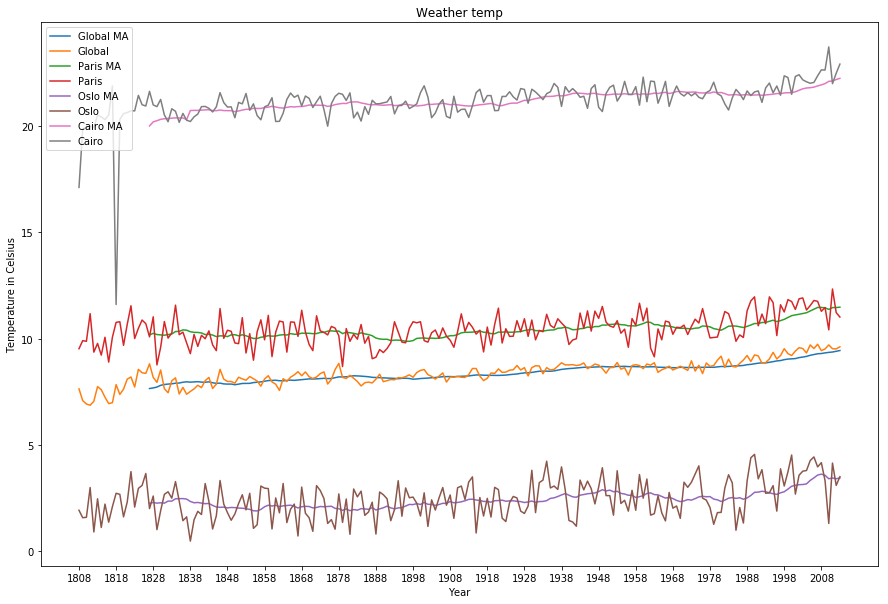

In [21]:
ma_range = 20
plt.figure(figsize=(15,10))
plt.plot( df_all['year'], df_all['avg_temp'].rolling(ma_range).mean(),label= 'Global MA');
plt.plot( df_all['year'], df_all['avg_temp'],label= 'Global');
plt.plot( df_all['year'], df_all['Paris_avg'].rolling(ma_range).mean(),label= 'Paris MA');
plt.plot( df_all['year'], df_all['Paris_avg'],label= 'Paris');
plt.plot( df_all['year'], df_all['Oslo_avg'].rolling(ma_range).mean(),label= 'Oslo MA');
plt.plot( df_all['year'], df_all['Oslo_avg'],label= 'Oslo');
plt.plot( df_all['year'], df_all['Cairo_avg'].rolling(ma_range).mean(),label= 'Cairo MA');
plt.plot( df_all['year'], df_all['Cairo_avg'],label= 'Cairo');
plt.ylabel('Temperature in Celsius');
plt.xlabel('Year');
plt.legend(loc='best');
plt.title('Weather temp');
plt.xticks(np.arange(min(df_all['year']), max(df_all['year']), 10));
plt.show();

# Learned insight

My city, Paris, is 2 degrees hotter on average compared to the global average.

The difference has been quite consistent over time.

The world is getting hotter quickcly and the trend has been consistent since 1870.

Around 1835, the word temp highly decrease, but not in Paris.

Since 1875 the temperature in the world is almost increasing each year.

While, in Paris, it was only since 1930 that the temperature is increasing.

We could do a comparison with the usage of petrol and coil in industry that has part in the responsibility of global warming.

Looking at to other cities like Cairo and Oslo, the warming is also present, but there is more variation in Oslo than in Cairo.

Olso temperatures seems really increasing only since 1980. A century after what we saw in global temperatures. Maybe it's due to the huge annual variations.

Cairo mesure for 1818 seems wrong because half the value of year before and year after.